In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyfits as pyf
import pres_style, os
from PyTools import err, binner, nbins
from scipy.ndimage.filters import gaussian_filter

In [3]:
def put_FITS_names(table):
    descr = table.dtype.descr
    for i in xrange(3): descr.pop(0)
    descr = [("input_file", "|S25")] + descr

    new_table = zeros(table.shape[0], dtype=descr)
    new_table["input_file"] = ["spSpec-{0:05d}-{1:04d}-{2:03d}.fit".format(r["mjd"], r["plate"], r["fiberID"]) for r in table]
    for f in new_table.dtype.names[1:]:
        new_table[f] = table[f]
    
    return new_table

In [ ]:
# catalog tables
snr = genfromtxt("data/RealDeal/snr.txt", dtype=None, names=True)
cat = genfromtxt("data/RealDeal/catalog.txt", dtype=None, names=True)
cin = put_FITS_names(genfromtxt("data/RealDeal/conIndex_test.txt", dtype=None, names=True))

# results tables
odir = os.path.expandvars("$master/inputs/real_deal7/outs/")
spec_ne = genfromtxt(odir+"spec/dynbas_output.log", dtype=None, names=True)
jpas_ne = genfromtxt(odir+"nem_jpas/dynbas_output.log", dtype=None, names=True)

spec_ne["input_file"] = ["spSpec"+name.lstrip("dynbasfit_processed_SPEC_").replace(".log", ".fit") for name in spec_ne["input_file"]]
jpas_ne["input_file"] = ["spSpec"+name.lstrip("dynbasfit_processed_nem_JPAS_").replace(".log", ".fit") for name in jpas_ne["input_file"]]

In [12]:
# match tables
spec_in_jpas = array([galaxy in jpas_ne["input_file"] for galaxy in spec_ne["input_file"]], dtype=bool)
in_spec_ne = array([galaxy in spec_ne["input_file"] for galaxy in snr["input_file"]], dtype=bool)
in_jpas_ne = array([galaxy in jpas_ne["input_file"] for galaxy in snr["input_file"]], dtype=bool)
mask = (in_spec_ne)&(in_jpas_ne)

print "matched all spec_ne in jpas_ne", all(spec_ne["input_file"][spec_in_jpas]==jpas_ne["input_file"])
print "matched all snr in physical properties tables?", all(snr[mask]["input_file"]==spec_ne["input_file"][spec_in_jpas])
print "matched all cat in physical properties tables?", all(cat[mask]["input_file"]==spec_ne["input_file"][spec_in_jpas])
print "matched all cin in physical properties tables?", all(cin[mask]["input_file"]==spec_ne["input_file"][spec_in_jpas])

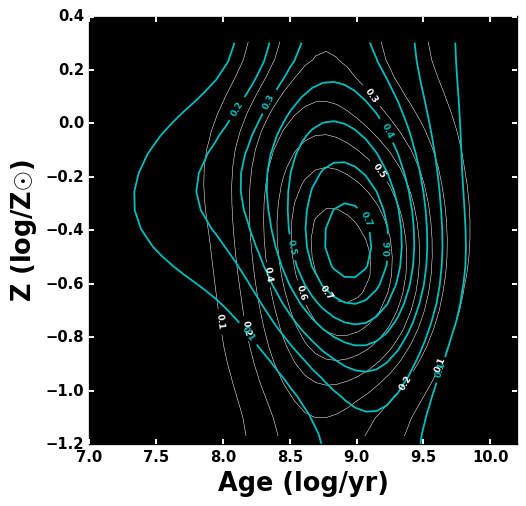

In [25]:
nx, xi, xf, bsx = nbins(spec_ne["log_t_L_mod"][spec_in_jpas])
ny, yi, yf, bsy = nbins(spec_ne["log_Z_L_mod"][spec_in_jpas])

H, xe, ye = histogram2d(spec_ne["log_t_L_mod"][spec_in_jpas], spec_ne["log_Z_L_mod"][spec_in_jpas], bins=(nx, ny), normed=True)
H = gaussian_filter(H, sigma=3)
cont = contour(xe[:- 1], ye[:- 1], H.T, colors="w", linewidths=0.4)
clabel(cont, fontsize=7, fmt=r"%.1f", inline=True)

H, xe, ye = histogram2d(jpas_ne["log_t_L_mod"], jpas_ne["log_Z_L_mod"], bins=(nx, ny), normed=True)
H = gaussian_filter(H, sigma=3)
cont = contour(xe[:- 1], ye[:- 1], H.T, colors="c", linewidths=1.4)
clabel(cont, fontsize=7, fmt=r"%.1f", inline=True)

xlim(7.0, 10.2)
ylim(-1.2, 0.4)

xlabel("Age (log/yr)")
ylabel("Z (log/Z$\odot$)")

ax = gca()
ax.set_axis_bgcolor("k")
ax.tick_params(direction="in", color="w", width=1.5)

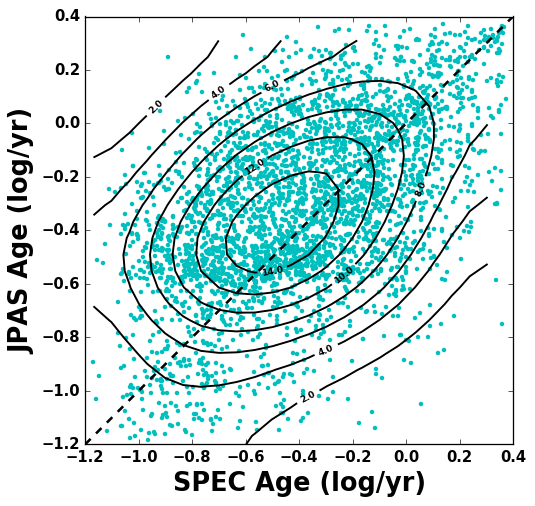

In [71]:
mask_chi = jpas_ne["chi_sq"]<700
label = "log_Z_L_mod"


nx, xi, xf, bsx = nbins(spec_ne[label][spec_in_jpas][mask_chi])
ny, yi, yf, bsy = nbins(jpas_ne[label][mask_chi])

H, xe, ye = histogram2d(spec_ne[label][spec_in_jpas][mask_chi], jpas_ne[label][mask_chi], bins=(nx, ny))
H = gaussian_filter(H, sigma=3)
cont = contour(xe[:- 1], ye[:- 1], H.T, colors="k", linewidths=1.5, zorder=100)
clabel(cont, fontsize=7, fmt=r"%.1f", inline=True)

plot(spec_ne[label][spec_in_jpas][mask_chi], jpas_ne[label][mask_chi], ".c")
plot(xlim(-1.2, 0.4), ylim(-1.2, 0.4), "--k")

xlabel("SPEC Age (log/yr)")
ylabel("JPAS Age (log/yr)")

dynbasfit_processed_nem_JPAS_spSpec-51609-0304-584.log
dynbasfit_processed_nem_JPAS_spSpec-51633-0268-093.log
dynbasfit_processed_nem_JPAS_spSpec-51641-0301-254.log
dynbasfit_processed_nem_JPAS_spSpec-51663-0315-118.log
dynbasfit_processed_nem_JPAS_spSpec-51663-0315-439.log
dynbasfit_processed_nem_JPAS_spSpec-51665-0296-005.log
dynbasfit_processed_nem_JPAS_spSpec-51666-0300-575.log
dynbasfit_processed_nem_JPAS_spSpec-51689-0312-540.log
dynbasfit_processed_nem_JPAS_spSpec-51690-0341-605.log
dynbasfit_processed_nem_JPAS_spSpec-51690-0345-190.log


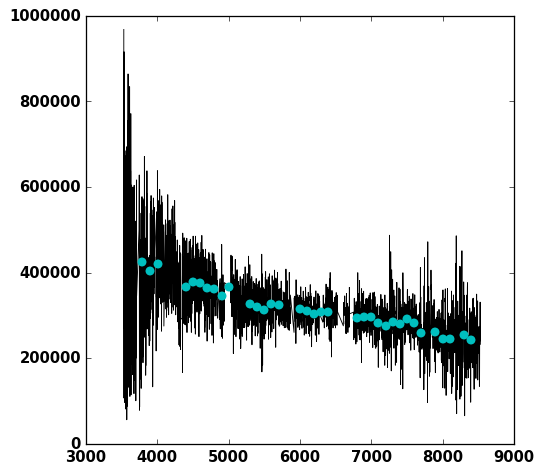

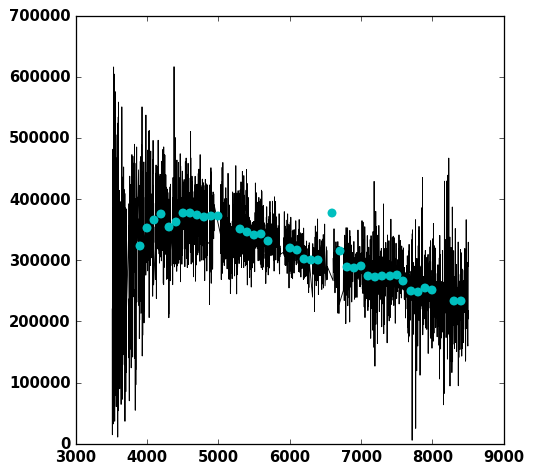

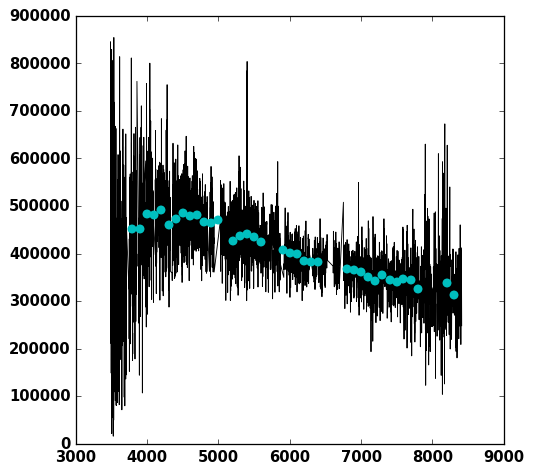

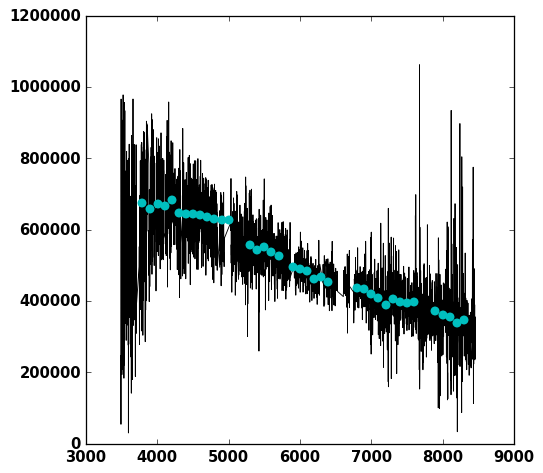

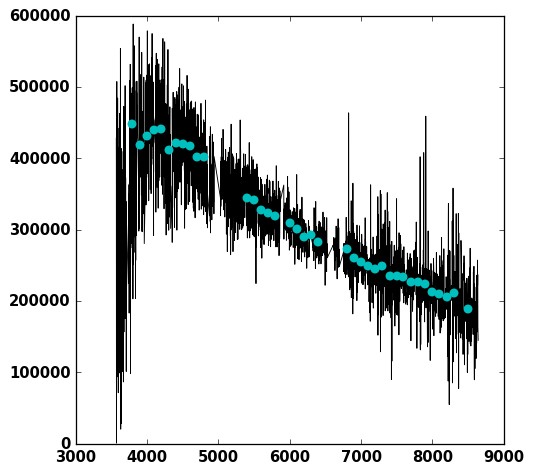

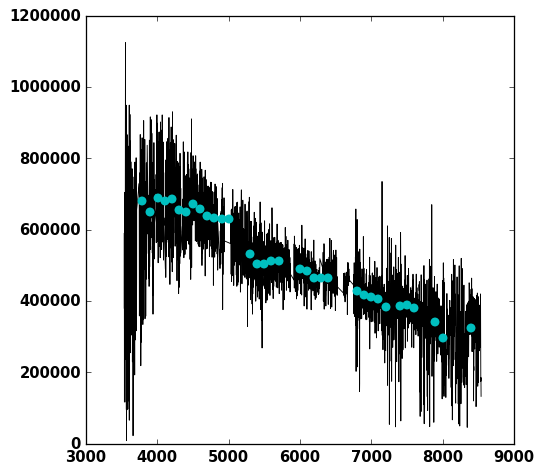

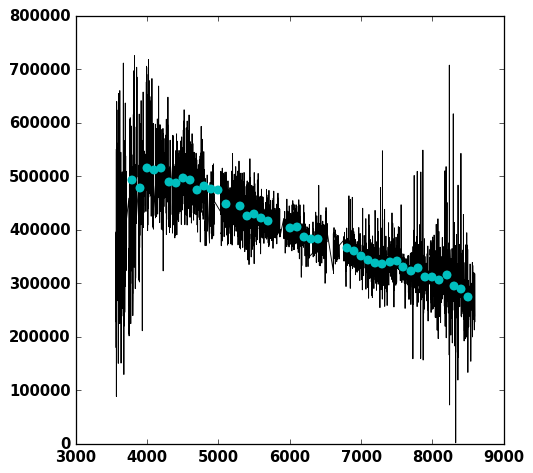

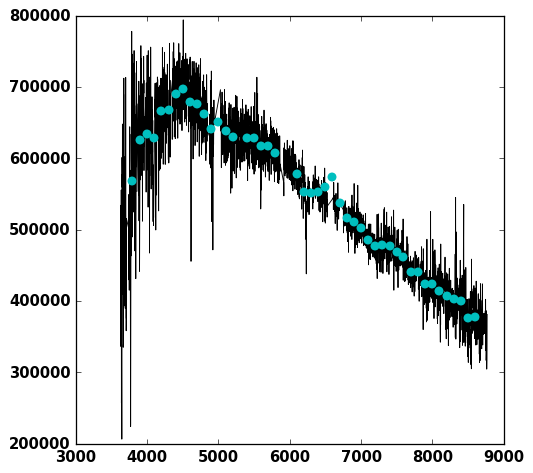

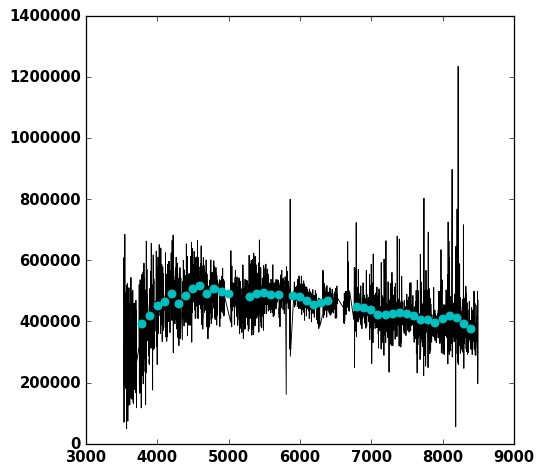

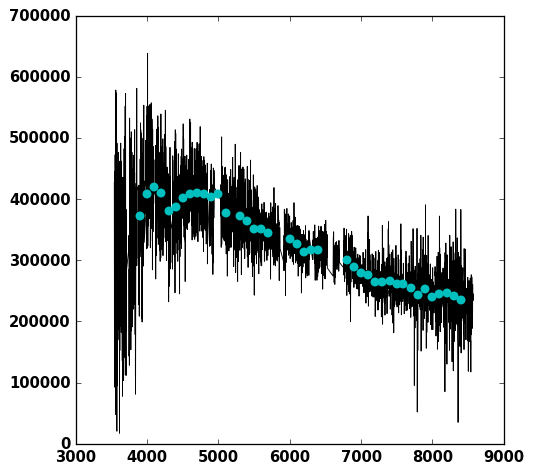

In [49]:
weird_list = jpas_ne["input_file"][(jpas_ne["log_t_L_mod"]>7.0)&(jpas_ne["log_t_L_mod"]<7.5)]

for galaxy in weird_list[:10]:
    sname = "dynbasfit_processed_SPEC_"+galaxy.replace(".fit", ".log")
    jname = "dynbasfit_processed_nem_JPAS_"+galaxy.replace(".fit", ".log")
    
    wls, fls = loadtxt(odir+"spec/"+sname, usecols=(0,1), unpack=True)
    wlj, flj = loadtxt(odir+"nem_jpas/"+jname, usecols=(0,1), unpack=True)

    figure()
    print jname
    plot(wls[fls>0], fls[fls>0], "-k", lw=0.7)
    plot(wlj[flj>0], flj[flj>0], "oc", mew=0)

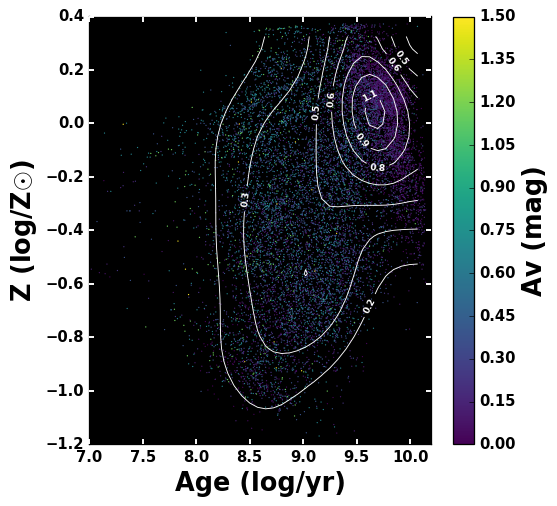

In [24]:
nx, xi, xf, bsx = nbins(spec_ne["log_t_L_mod"])
ny, yi, yf, bsy = nbins(spec_ne["log_Z_L_mod"])

H, xe, ye = histogram2d(spec_ne["log_t_L_mod"], spec_ne["log_Z_L_mod"], bins=(nx, ny), normed=True)
H = gaussian_filter(H, sigma=3)

cont = contour(xe[:- 1], ye[:- 1], H.T, colors="w", linewidths=0.7)
clabel(cont, fontsize=7, fmt=r"%.1f", inline=True)

scatter(spec_ne["log_t_L_mod"], spec_ne["log_Z_L_mod"], c=spec_ne["Av_mod"], s=1, lw=0, vmin=0.0, vmax=1.5, cmap=cm.viridis)
cb = colorbar()

xlim(7.0, 10.2)
ylim(-1.2, 0.4)

xlabel("Age (log/yr)")
ylabel("Z (log/Z$\odot$)")
cb.set_label("Av (mag)")

ax = gca()
ax.set_axis_bgcolor("k")
ax.tick_params(direction="in", color="w", width=1.5)